# Optimal Portfolio

## Construction of an optimal portfolio (# 3.13.)

We would like to invest \$10,000 into shares of companies $XX$ and $YY$.

- Shares of $XX$ cost \$20 per share with an expected return $E[XX] =$ \$1.00, and a standard deviation of \$0.50
- Shares of $YY$ cost \$50 per share with an expected return $E[YY] =$ \$2.50, and a standard deviation of \$1.00

In order to maximize the expected return and minimize the risk (standard deviation or variance), is it better to invest 

(A) all \$10,000 into $XX$

(B) all \$10,000 into $YY$

(C) \$5,000 in each company?

In [1]:
I = 10_000 # investment
XX = 20  # price of share XX
E_X = 1.0 # expected return E[XX]
STD_X = 0.5 # a standard deviation of E[XX]
YY = 50  # price of share YY
E_Y = 2.5 # expected return E[YY]
STD_Y = 1.0 # a standard deviation of E[YY]

1.0

In [2]:
SA(X) = (I/XX)*X # number of shares for option A
SB(Y) = (I/YY)*Y # number of shares for option B
SC(X,Y) = ((I/(2XX))*X, (I/(2YY))*Y) # number of shares for option C

SC (generic function with 1 method)

In [3]:
# Profit for option A
E_A, Var_A = SA(E_X), SA(STD_X)^2

(500.0,62500.0)

In [4]:
# Profit for option B
E_B, Var_B = SB(E_Y), SB(STD_Y)^2

(500.0,40000.0)

In [5]:
# Profit for option C
E_C, Var_C = SC(E_X, E_Y) |> sum, map(v->v^2, SC(STD_X, STD_Y)) |> sum

(500.0,25625.0)

In [7]:
sqrt(25625)

160.0781059358212

In terms of the expected return, all three portfolios are equivalent. However, Portfolio C, where investment is split between two companies, has the **lowest variance**; therefore, it is the **least risky**.

## Optimal portfolio, correlated returns (# 3.14.)

Suppose now that the individual stock returns $X$ and $Y$ are no longer independent. If the correlation coefficient is $\rho = 0.4$

- How will it change the results of the previous example?
- What if they are negatively correlated with $\rho = -0.2$?

Only the volatility of the diversified **portfolio C** changes due to the correlation coefficient.

In [8]:
ρ = 0.4 # correlation coefficient
cov_XY = ρ * STD_X * STD_Y # Covariance between stocks X and Y

0.2

In [9]:
# thus the variance of C increases
Var_C + 2*prod(SC(1., 1.))*cov_XY

35625.0

Nevertheless, the diversified portfolio C is still optimal. When $X$ and $Y$ are positively correlated, low values of $X$ are likely to accompany low values of $Y$, thus higher risk.

In [10]:
ρ = -0.2 # negative correlation coefficient
cov_XY = ρ * STD_X * STD_Y # Covariance between stocks X and Y

-0.1

In [11]:
# thus the variance of C decreases
Var_C + 2*prod(SC(1., 1.))*cov_XY

20625.0

Diversified portfolios consisting of negatively correlated components are the least risky.

## Optimizing even further (# 3.15.)

What is the most optimal portfolio consisting of shares of $XX$ and $YY$, given their correlation coefficient of $\rho = -0.2$?

Suppose $t$ dollars are invested into $XX$ and $(10,000-t)$ dollars into $YY$, with the resulting profit is $C_t$.

In [12]:
t = 0.:10_000 |> collect
a, b = t/20, (10_000-t)/50

Var_Ct = (a.^2)*STD_X^2 + (b.^2)*STD_Y^2 + 2.*a.*b.*cov_XY
min_Var_Ct, min_Var_Ct_idx = findmin(Var_Ct)

println("Variance of the optimal portfolio is $min_Var_Ct \$²")
println("Portfolio shares: X = $(a[min_Var_Ct_idx]), X = $(b[min_Var_Ct_idx])")

Variance of the optimal portfolio is 19591.8369 $²
Portfolio shares: X = 204.1, X = 118.36


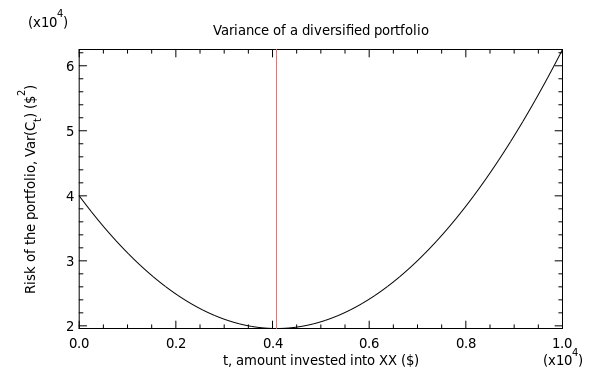

In [13]:
import PLplot
PLplot.draw(:pngcairo) do opts
    PLplot.plot(t, Var_Ct, typ=:line)
    PLplot.labels("t, amount invested into XX (\$)",
                  "Risk of the portfolio, Var(C#dt#u) (\$#u2#d)",
                  "Variance of a diversified portfolio")
    PLplot.abline!(v=t[min_Var_Ct_idx], col=7)
end    